# The Southern Ocean Reentrant Channel Tutorial
This notebook provides an overview of the steps to compile, run, and get familiar with the MITgcm Southern Ocean Reentrant Channel Tutorial experiment.

Let's import some modules we'll need to explore this model:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm

## Organize Your Local Directory

We're going to run this model on the computing cluster but we'll analyze the results on our local machine. In your folder for this class, create a `model` folder which will store pertinent files from your run directory along with some plots we'll make to visualize and analyze the output. Define a path to the model folder here:

In [6]:
model_folder = '/Users/cool/Workspace/MLML/ms274_fall2025/Lectures/Week 7/model'

Up next, let's make sure we have folders for the run files and the plots in this directory:

In [7]:
if 'plots' not in os.listdir(model_folder):
    os.mkdir(os.path.join(model_folder, 'plots'))
if 'run' not in os.listdir(model_folder):
    os.mkdir(os.path.join(model_folder, 'run'))

## Getting Familiar with the Model Domain
Before running a model, it's always a good idea to get familiar with the domain of the model so we know what to expect in the outputs. Let's define some of the key grid parameters here:

In [19]:
# define the shape of the model grid
n_rows = 20
n_cols = 40
Nr = 49


 # delX=20*50.E3,
 # delY=40*50.E3,
# define the distances corresponding to the model grid dimensions
dx = 50e3
dy = 50e3
x = np.arange(n_cols) * dx
y = np.arange(n_rows) * dy
print(x)

[      0.   50000.  100000.  150000.  200000.  250000.  300000.  350000.
  400000.  450000.  500000.  550000.  600000.  650000.  700000.  750000.
  800000.  850000.  900000.  950000. 1000000. 1050000. 1100000. 1150000.
 1200000. 1250000. 1300000. 1350000. 1400000. 1450000. 1500000. 1550000.
 1600000. 1650000. 1700000. 1750000. 1800000. 1850000. 1900000. 1950000.]


With the grid dimensions in hand, let's take a peek at the model bathymetry file. This file is called `bathy.50km.bin`. Make a copy of this file in your `run` directory and read in the grid:

In [22]:
# read in the bathymetry grid
bathy = np.fromfile(os.path.join(model_folder, 'input', 'bathy.50km.bin'),
                    dtype='>f4').reshape((n_cols, n_rows))

Next, let's create a quick plot of the bathymetry grid:

(40, 20)


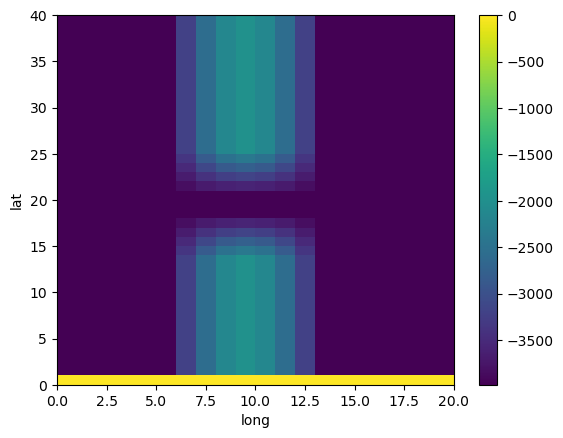

In [24]:
# plot the bathymetry grid

plt.pcolormesh(bathy)
plt.colorbar()
plt.xlabel('long')
plt.ylabel('lat')
print(np.shape(bathy))

What features do you see in this bathymetry? Where on the globe is this domain meant to appoximate?

## Prepare, Compile, and Run the Model Configuration

This model configuration is provided with MITgcm so let's navigate over to the `MITgcm/verification/tutorial_reentrant_channel` directory in your MITgcm clone on the computing cluster.

### Compiling the Model

Since we are on the computing cluster, let's update the `SIZE.h` file to run with multiple processors:

```
cd code
mv SIZE.h SIZE.h_no_mpi
mv SIZE.h_mpi SIZE.h
```

Next, let's compile the model code with MPI:

```
cd ../build
conda activate ms274
export MPI_HOME=/scratch/home/[username]/.conda/envs/ms274
../../../tools/genmake2 -of ../../../tools/build_options/linux_amd64_gfortran -mods ../code -mpi
make depend
make
```

### Preparing the Model Run

To begin preparing the run directory, let's move to the run directory and then link the pertinent build and input files:

```
cd ../run
ln -s ../input/* .
ln -s ../build/mitgcmuv .
```

This model run is designed to be run for a 30 year time period so that adjustments in the spin-up can get sorted out before the analysis is complete. However, we don't have time for all that in class so I've already run the model for 28 years. We can use the pickup file from this previous model run to examine just the final 2 years of the model.

To implement this pickup, download the `pickup.0000870912.data` and `pickup.0000870912.meta` pickup files from Canvas and move them into the run directory. Then, update the data file with the following changes:
- nIter0 should be set to the iteration of the pickup files
- nTimesteps should be set to enough timesteps for a 2-year 
- change the monitorFreq to 864000
- uncomment `useSingleCpuIO=.TRUE.,`

Next, we'll update the diagnostics for this model to faciliate an analysis we'll carry out in the next notebooks. Download the `data.diagnostics` file from Canvas and replace the existing file in the run directory with the new one.

### Run the Model

With these changes, we're ready to run the model. As always, we'll need to make a job script to submit the code to the queue. 

Copy over one of your previous job scripts to this directory and edit the number of processors to be set for this job. Then, run the model! This process should take approximately 1 minute of wall-clock time for each model month.

### Download the Diags directory

During this model run, your model should have output a bunch of files into a directory called Diags in the run directory. Download this entire directory onto your local drive in your local run directory. The subsequent analysis notebooks will rely on this output.